In [1]:
import AI_Frameworks_LDA
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osama.nasir@ebryx.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.downloader as api

# spacy for lemmatization
import spacy

# sklearn
from sklearn.preprocessing import MinMaxScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#df_tmp = curriculaLDA.loadCurricula()

In [4]:
#df_tmp.to_excel("all_curricula.xlsx", engine='xlsxwriter')
#len(df_tmp)

# Preprocessing Data

In [5]:
df1 = pd.read_excel('SDG_Project_text.xlsx')
#df = df_tmp

In [6]:
df1.head()

,Project Name,text
0,DYMAXION LABS,Dymaxion Labs facilitates our understanding of...
1,Layers against inequality,Paraguay has a broad rural social group with m...
2,ParaEmpleo,ParaEmpleo is the first digital platform in th...
3,Support to Workers and Migrants,Given a migrant and a job on the Internet that...
4,MERON,"Kimetrica, a social enterprise with bases in t..."


In [7]:
len(df1)

10

In [8]:
df2 = pd.read_excel('SDG_Project_meta.xlsx')

In [9]:
df2.head()

,Project Name,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,DYMAXION LABS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Layers against inequality,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,ParaEmpleo,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Support to Workers and Migrants,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,MERON,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
len(df2)

10

In [11]:
#df = pd.concat([df1, df2], ignore_index=True)
#len(df)

In [12]:
#df.tail()

In [13]:
corpus, id2word, data_lemmatized = AI_Frameworks_LDA.preprocessData(df1)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [14]:
#corpus2, id2word2, data_lemmatized2 = AI_Frameworks_LDA.preprocessData(df2)

In [14]:
print(len(corpus))
print(len(id2word))
print(len(data_lemmatized))
#print(len(corpus2))
#print(len(id2word2))
#print(len(data_lemmatized2))

10
134
10


# GloVe Embedding

In [18]:
model = api.load("glove-wiki-gigaword-100")

In [117]:
#defining all 17 SDGs
sdg1 = [['africa'],['basic', 'services'],['class'],['developing', 'countries'],['disadvantaged'],['economic', 'resources'],['end', 'poverty'],['environment'],['equality'],['extreme', 'poverty'],['financial', 'inclusion'],['income'],['income', 'equality'],['microfinance'],['non-discrimination'],['poor'],['poor', 'and', 'vulnerable'],['poverty'],['poverty', 'eradication'],['poverty', 'line'],['quality', 'of', 'life'],['resources'],['social', 'protection', 'systems'],['social', 'protection'],['sustainable'],['third', 'world'],['vulnerable'],['wealth', 'distribution']]
sdg2 = [['agricultural', 'orientation', 'index'],['agricultural', 'productivity'],['agriculture'],['consume'],['crop', 'diversity'],['crops'],['doha', 'development', 'round'],['doha', 'round'],['end', 'hunger'],['environment'],['food'],['food', 'gap'],['food', 'production'],['food', 'reserves'],['food', 'security'],['genetic', 'diversity'],['genetic', 'diversity', 'of', 'seeds'],['genetics'],['hunger'],['hungry', 'people'],['improved', 'nutrition'],['innovations', 'and', 'health'],['legumes'],['maize'],['malnourished'],['malnutrition'],['nutrition'],['nutritional', 'needs'],['nutritious'],['poverty'],['produce'],['productivity'],['quality', 'of', 'life'],['resilient', 'agriculture'],['rural', 'infrastructure'],['small', 'scale', 'food', 'producers'],['stunted', 'growth'],['stunting'],['sufficient', 'food'],['sustainable'],['sustainable', 'agriculture'],['sustainable', 'food', 'production'],['trade', 'diversity'],['trade', 'restrictions'],['under', 'nourished'],['undernourished'],['wasting'],['world', 'hungry']]
sdg3 = [['access', 'to', 'clean', 'water', 'and', 'sanitation'],['affordable', 'medicines'],['aids'],['air', 'contamination'],['air', 'pollution'],['alcohol', 'abuse'],['antenatal', 'care'],['antiretroviral'],['antiretroviral', 'therapy'],['biomedical'],['bodily', 'autonomy'],['child', 'deaths'],['contraceptive', 'use'],['death', 'rate'],['dental'],['disability', 'and', 'family', 'support'],['disability', 'and', 'inclusion'],['disability', 'and', 'politics', 'of', 'location'],['diseases'],['family', 'planning'],['health'],['health', 'in', 'resource-constrained', 'settings'],['health', 'worker', 'density'],['healthy'],['healthy', 'lives'],['hepatitis'],['hiv'],['improving', 'mortality'],['increasing', 'life', 'expectancy'],['indigenous'],['infected'],['international', 'health', 'policy'],['international', 'health', 'regulations'],['malaria'],['maternal', 'mortality'],['measles'],['medical'],['mental', 'health'],['mortality'],['mortality', 'rate'],['narcotic', 'drug', 'abuse'],['neonatal', 'mortality'],['polio'],['premature', 'mortality'],['preventable', 'deaths'],['reducing', 'malaria'],['reducing', 'mortality'],['refugees', 'and', 'health', 'services'],['reproductive', 'health'],['road', 'traffic', 'accidents'],['sexual', 'and', 'reproductive', 'health-care'],['sexual', 'health'],['soil', 'contamination'],['soil', 'pollution'],['tobacco', 'control'],['treatment', 'of', 'substance', 'abuse'],['tuberculosis'],['universal', 'health'],['universal', 'health', 'coverage'],['vaccines'],['vaccines', 'in', 'developing', 'countries'],['violence'],['wash'],['water', 'sanitation', 'and', 'hygiene', 'for', 'all'],['water', 'borne', 'disease'],['wellbeing'],['well', 'being'],['well-being'],['world', 'health', 'organisation']]
sdg4 = [['access', 'to', 'education'],['basic', 'education'],['basic', 'literacy'],['basic', 'literacy', 'skills'],['cultural', 'diversity'],['disability'],['disability', 'and', 'education'],['early', 'childhood'],['early', 'childhood', 'development'],['education'],['education', 'for', 'sustainability'],['education', 'in', 'developing'],['enrolment'],['equal', 'access'],['equal', 'education'],['equitable', 'education'],['gender', 'disparities', 'in', 'education'],['gender', 'disparity'],['gender', 'equality'],['gender', 'equity'],['gender', 'sensitive'],['global', 'citizenship'],['global', 'education'],['inclusion', 'and', 'education'],['inclusive'],['innovation'],['international', 'cooperation'],['learning', 'opportunities'],['lifelong', 'learning'],['literacy'],['literacy', 'skills'],['numeracy'],['preprimary', 'education'],['primary', 'education'],['qualified', 'teachers'],['refugees', 'and', 'learning'],['scholarships'],['school'],['school', 'enrolment'],['secondary', 'education'],['teacher', 'training'],['universal', 'education'],['vocational', 'training'],['vulnerable'],['women', 'rights']]
sdg5 = [['basic', 'living', 'standards'],['dignity'],['disadvantaged'],['discrimination'],['employment'],['empower', 'girls'],['empowerment'],['empowerment', 'of', 'women'],['empower', 'women'],['women', 'empowerment'],['equal', 'access'],['equal', 'opportunities'],['equality'],['exploitation'],['female', 'genital', 'mutilation'],['feminism'],['forced', 'marriage'],['gender'],['gender', 'discrimination'],['gender', 'equality'],['gender', 'parity'],['governance', 'and', 'gender'],['human', 'rights'],['human', 'trafficking'],['humanitarian'],['marginalised'],['parity'],['pay'],['reproductive', 'rights'],['sexual', 'and', 'reproductive', 'health'],['sexual', 'exploitation'],['sexual', 'violence'],['social', 'inclusion'],['trafficking'],['universal', 'health', 'coverage'],['violence'],['violence', 'against', 'girls'],['violence', 'against', 'women'],['women'],['women', 'in', 'work'],['women', 'rights'],['workplace', 'equality']]
sdg6 = [['accessible', 'water'],['affordable', 'drinking', 'water'],['aquifer'],['cities'],['clean', 'water'],['contaminated'],['defecation'],['desalination'],['diarrhoeal', 'diseases'],['drought'],['dumping'],['ecosystem', 'protection'],['ecosystem', 'restoration'],['equitable', 'sanitation'],['floods'],['fresh', 'water'],['hydropower'],['hygiene'],['improving', 'water'],['inadequate', 'water'],['inadequate', 'water', 'supply'],['infrastructure'],['irrigation'],['lakes'],['latrines'],['open', 'defecation'],['pollution'],['recycled', 'water'],['reuse'],['river', 'basins'],['rivers'],['safe', 'drinking', 'water'],['sanitation'],['sanitation', 'and', 'hygiene'],['sanitation', 'management'],['sewerage'],['sustainable', 'water', 'management'],['sustainable', 'withdrawals'],['third', 'world'],['toilets'],['untreated', 'wastewater'],['urban'],['waste'],['wastewater'],['wastewater', 'treatment'],['water'],['water', 'access'],['water', 'disasters'],['water', 'ecosystems'],['water', 'efficiency'],['water', 'harvesting'],['water', 'quality'],['water', 'resources', 'management'],['water', 'scarcity'],['water', 'supply'],['water-related', 'ecosystems'],['water-use', 'efficiency']]
sdg7 = [['affordable', 'energy'],['alternative', 'energy'],['animal', 'waste'],['battery'],['carbon'],['charcoal'],['clean', 'energy'],['clean', 'energy', 'technology'],['clean', 'fuel', 'technology'],['clean', 'fuels'],['cleaner', 'fossil', 'fuel', 'technology'],['climate', 'goal'],['coal'],['electricity'],['electricity', 'infrastructure'],['emissions'],['energy'],['energy', 'efficiency'],['energy', 'infrastructure'],['energy', 'research'],['energy', 'technology'],['fossil-fuel'],['green', 'economy'],['greenhouse', 'gas'],['greenhouse', 'gas', 'emissions'],['hydroelectric'],['low', 'carbon'],['modern', 'electricity'],['modern', 'energy'],['reliable', 'energy'],['renewable'],['renewable', 'energy'],['renewable', 'power'],['solar'],['solar', 'energy'],['solar', 'power'],['sustainable', 'energy'],['sustainable', 'energy', 'services'],['sustainable', 'power'],['vehicles'],['wave'],['wind'],['wind', 'power'],['wind', 'turbine'],['wood']]
sdg8 = [['aid', 'for', 'trade'],['banking'],['child', 'labour'],['child', 'soldiers'],['creativity', 'and', 'innovation'],['culture'],['decent', 'work'],['decent', 'work', 'for', 'all'],['development', 'oriented', 'policy'],['economic', 'growth'],['economic', 'productivity'],['economy'],['enterprises'],['entrepreneurship'],['equal', 'pay'],['finance'],['financial', 'services'],['forced', 'labour'],['gdp', 'growth'],['global', 'resource', 'efficiency'],['global', 'trade'],['gross', 'domestic', 'product', 'growth'],['human', 'trafficking'],['inclusive', 'economic', 'growth'],['innovation'],['insurance'],['job', 'creation'],['jobs'],['labour', 'market'],['labour', 'rights'],['micro', 'finance'],['migrant', 'workers'],['modern', 'slavery'],['poverty', 'eradication'],['poverty', 'line'],['productive', 'employment'],['productivity'],['public', 'policy'],['quality', 'jobs'],['quality', 'of', 'life'],['resource', 'efficiency'],['safe', 'work'],['secure', 'work'],['slavery'],['social', 'policies'],['society'],['stable', 'employment'],['stable', 'jobs'],['sustainable', 'consumption'],['sustainable', 'economic', 'growth'],['sustainable', 'production'],['sustainable', 'tourism'],['trade'],['unemployment'],['well-paid', 'jobs'],['women', 'migrants'],['work'],['work', 'opportunities'],['world', 'trade'],['youth', 'employment'],['youth', 'unemployment']]
sdg9 = [['access', 'to', 'the', 'internet'],['affordable', 'access'],['affordable', 'credit'],['clean', 'technologies'],['cooperation'],['data', 'banks'],['economic', 'development'],['electrical', 'power'],['energy'],['enterprises'],['environmentally', 'sound', 'technologies'],['financial', 'services'],['ict', 'infrastructure'],['industrial', 'diversification'],['industrialisation'],['information', 'and', 'communication', 'technology'],['infrastructure'],['innovation'],['internet', 'access'],['irrigation'],['knowledge', 'in', 'education', 'for', 'all'],['mobile', 'networks', 'in', 'developing', 'countries'],['national', 'security'],['network', 'infrastructure'],['phone', 'service'],['public', 'policy'],['quality', 'of', 'life'],['regional', 'infrastructure'],['research'],['resilient', 'infrastructure'],['resource', 'use', 'efficiency'],['roads'],['sanitation'],['scientific', 'research'],['society'],['sustainable', 'industrialisation'],['sustainable', 'infrastructure'],['technological', 'capabilities'],['technology'],['trade'],['transborder', 'infrastructure'],['transport'],['value', 'chains'],['value', 'chains', 'and', 'markets'],['water', 'infrastructure'],['water', 'resources']]
sdg10 = [['affordable', 'housing'],['age'],['ageism'],['business'],['children'],['culture'],['developing', 'countries'],['developing', 'states'],['development', 'assistance'],['disabilities'],['discrimination'],['discriminatory'],['economy'],['education'],['empower'],['equal', 'opportunity'],['equality'],['equity'],['ethnicity'],['financial', 'assistance'],['foreign', 'aid'],['foreign', 'investment'],['gender'],['global', 'financial', 'markets'],['health'],['homelessness'],['homophobia'],['human', 'rights'],['inclusion'],['income', 'growth'],['income', 'inequality'],['indigenous'],['inequalities'],['inequality'],['migrant', 'remittance'],['migration'],['population', 'growth'],['poverty'],['public', 'policy'],['quality', 'of', 'life'],['race'],['racisim'],['reduce', 'inequalities'],['religion'],['rural'],['sex'],['sexism'],['social', 'protection'],['society'],['vulnerable', 'nations'],['world', 'trade']]
sdg11 = [['adaptable'],['adaptation'],['affordable', 'housing'],['air', 'pollution'],['air', 'quality'],['cities'],['climate', 'change'],['community'],['cultural', 'heritage'],['decentralisation'],['development', 'planning'],['disaster', 'management'],['disaster', 'risk', 'reduction'],['disaster', 'strategy'],['disasters'],['fine', 'particulate', 'matter'],['green', 'spaces'],['heritage'],['housing'],['human', 'settlements'],['impact', '', 'of', 'cities'],['inadequate', 'housing'],['informal', 'settlements'],['infrastructure'],['land'],['land', 'consumption'],['local', 'materials'],['mitigation'],['natural', 'disasters'],['natural', 'heritage'],['over', 'crowding'],['pollution'],['population'],['population', 'growth'],['public', 'spaces'],['public', 'transport'],['resilient'],['resilient', 'buildings'],['resource', 'efficiency'],['resource', 'needs'],['risk', 'reduction', 'strategy'],['road', 'safety'],['safe', 'cities'],['shanty'],['slums'],['smart', 'cities'],['solid', 'waste'],['suburban'],['sustainable'],['sustainable', 'building'],['sustainable', 'buildings'],['sustainable', 'cities/city'],['sustainable', 'communities'],['sustainable', 'urbanisation'],['town', 'planning'],['transport'],['transport', 'systems'],['urban'],['urban', 'development'],['urban', 'planning'],['urban', 'sustainability'],['urbanisation'],['waste'],['waste', 'generation'],['waste', 'management'],['water'],['water', 'related', 'disasters']]
sdg12 = [['capitalism'],['cars'],['circular', 'economy'],['commercial', 'enterprises'],['consumer', 'levels'],['consumerism'],['consumption'],['deep', 'decarbonisation'],['ecological'],['efficient', 'use', 'of', 'resources'],['energy'],['energy', 'consumption'],['energy', 'efficiency'],['energy', 'use'],['food'],['food', 'losses'],['food', 'supply'],['food', 'waste'],['fossil', 'fuel', 'subsidies'],['future', 'proof'],['global', 'food', 'waste'],['greenhouse', 'gasses'],['harvest', 'losses'],['life', 'cycle'],['market', 'distortions'],['materialism'],['materials', 'goods'],['monitoring', 'sustainable', 'development'],['natural', 'resources'],['obsolescence'],['overconsumption'],['production'],['recycle'],['recycling'],['reduce', 'waste', 'generation'],['reduction'],['renewable'],['resource', 'efficiency'],['responsible', 'production', 'chains'],['retail'],['retail', 'industry'],['reuse'],['sustainable'],['sustainable', 'consumption'],['sustainable', 'management'],['sustainable', 'practices'],['sustainable', 'production'],['sustainable', 'public', 'procurement'],['sustainable', 'resource', 'use'],['sustainable', 'supply', 'chain'],['sustainable', 'tourism'],['vehicles'],['waste'],['wasteful', 'consumption'],['water'],['water', 'pollution'],['water', 'supply']]
sdg13 = [['average', 'global', 'temperature'],['carbon'],['carbon', 'dioxide'],['changing', 'weather', 'patterns'],['climate'],['climate', 'action'],['climate', 'adaptation'],['climate', 'and', 'gender'],['climate', 'and', 'infectious', 'disease'],['climate', 'and', 'politics'],['climate', 'change'],['climate', 'change', 'management'],['climate', 'change', 'planning'],['climate', 'change', 'policy'],['climate', 'early', 'warning'],['climate', 'hazards'],['climate', 'impact'],['climate', 'mitigation'],['climate', 'refugees'],['climate', 'related', 'hazards'],['climate', 'resilience'],['co2', 'capture'],['co2', 'conversion'],['cop', '21'],['cop', '22'],['ecosystems'],['emissions'],['extreme', 'weather'],['extreme', 'weather', 'events'],['global', 'mean', 'temperature'],['global', 'temperature'],['global', 'warming'],['greenhouse', 'gas'],['greenhouse', 'gas', 'emissions'],['greenhouse', 'gases'],['ice', 'loss'],['low-carbon', 'economy'],['natural', 'disasters'],['natural', 'systems'],['ocean', 'warming'],['paris', 'agreement'],['pollution'],['renewable'],['sea', 'level', 'rise'],['rising', 'sea'],['rising', 'sea', 'level'],['temperature'],['warming']]
sdg14 = [['artisanal', 'fishers'],['biodiversity'],['carbon', 'dioxide'],['coastal', 'biodiversity'],['coastal', 'ecosystems'],['coastal', 'habitats'],['coastal', 'parks'],['coastal', 'resources'],['coastlines'],['conserve'],['conserve', 'oceans'],['coral', 'bleaching'],['coral', 'reef'],['ecosystem', 'management'],['fish', 'species'],['fish', 'stocks'],['fish', 'stocks', 'and', 'fisheries', 'management'],['fisheries'],['fishers'],['fishing'],['fishing', 'practices'],['global', 'warming'],['illegal', 'fishing'],['kelp'],['law', 'of', 'the', 'sea'],['marine'],['marine', 'areas'],['marine', 'biodiversity'],['marine', 'ecosystems'],['marine', 'fisheries'],['marine', 'parks'],['marine', 'pollution'],['marine', 'resources'],['ocean'],['ocean', 'acidification'],['ocean', 'temperature'],['oceanography'],['oceans'],['overfishing'],['productive', 'oceans'],['protected', 'areas'],['sea', 'grasses'],['seas'],['sustainable', 'ecosystems'],['unregulated', 'fishing'],['water', 'resources', 'and', 'policy']]
sdg15 = [['afforestation'],['agriculture'],['animals'],['arable', 'land'],['bees'],['biodiversity'],['biodiversity', 'loss'],['conservation'],['deforestation'],['desertification'],['drought'],['drylands'],['ecosystem'],['ecosystem', 'restoration'],['ecosystems'],['extinct'],['extinct', 'species'],['extinction'],['forest'],['forest', 'management'],['forests'],['genetic', 'resources'],['illegal', 'wildlife', 'products'],['illicit', 'trafficking'],['indigenous'],['indigenous', 'populations'],['invasive', 'alien', 'species'],['land', 'conservation'],['land', 'degradation'],['land', 'loss'],['land', 'use', 'and', 'sustainability'],['manage', 'forests'],['managed', 'forests'],['micro-organisms'],['permaculture'],['plants'],['poaching'],['poverty'],['protected', 'fauna'],['protected', 'flora'],['protected', 'species'],['reforestation'],['soil'],['soil', 'degradation'],['species'],['strategic', 'plan', 'for', 'biodiversity'],['terrestrial', 'ecosystems'],['threatened', 'species'],['tree'],['tree', 'species'],['wetlands']]
sdg16 = [['abuse'],['accountability'],['accountable', 'institutions'],['arbitrary', 'detention'],['arms'],['arms', 'trafficking'],['birth', 'registration'],['bribery'],['combat', 'terrorism'],['conflict', 'resolution'],['conflicts'],['corruption'],['discrimination'],['education'],['enforced', 'disappearance'],['equal', 'access'],['equity'],['exploitation'],['flow', 'of', 'arms'],['freedom'],['geography', 'of', 'poverty'],['governance'],['hate', 'crime'],['human', 'rights'],['human', 'trafficking'],['illegal', 'arms'],['illicit', 'financial', 'flows'],['inclusion'],['inclusive', 'institutions'],['inclusive', 'societies/society'],['institutions'],['internally', 'displaced'],['judiciary'],['justice'],['justice', 'for', 'all'],['legal', 'identity'],['national', 'security'],['non-violence'],['organized', 'crime'],['paris', 'principles'],['peace'],['peaceful', 'societies'],['physical', 'abuse'],['police'],['prevent', 'violence'],['psychological', 'abuse'],['public', 'policy'],['quality', 'of', 'life'],['representative', 'decision-making'],['rule', 'of', 'law'],['security', 'threats'],['sexual', 'abuse'],['sexual', 'violence'],['stolen', 'assets'],['tax', 'evasion'],['theft'],['torture'],['trafficking'],['transparency'],['unsentenced', 'detainees'],['unstable', 'societies'],['victims', 'of', 'violence'],['violence'],['violence', 'against', 'women', 'and', 'children'],['violence', 'rates'],['weapon', 'seizures']]
sdg17 = [['capacity', 'building'],['civil', 'society', 'partnerships'],['communication', 'technologies'],['debt', 'sustainability'],['development', 'assistance'],['disaggregated', 'data'],['doha', 'development', 'agenda'],['entrepreneurship'],['environmentally', 'sound', 'technologies'],['foreign', 'direct', 'investments'],['fostering', 'innovation'],['free', 'trade'],['fundamental', 'principles', 'of', 'official', 'statistics'],['global', 'partnership'],['global', 'partnership', 'for', 'sustainable', 'development'],['global', 'stability'],['international', 'aid'],['international', 'cooperation'],['international', 'population', 'and', 'housing', 'census'],['international', 'support'],['international', 'support', 'for', 'developing', 'countries'],['knowledge', 'sharing'],['multi-stakeholder', 'partnerships'],['poverty', 'eradication'],['public-private', 'partnerships'],['science', 'cooperation', 'agreements'],['technology', 'cooperation', 'agreements'],['technology', 'transfer'],['weighted', 'tariff', 'average'],['women', 'entrepreneurs'],['world', 'trade', 'organization']]
sdg_list = [sdg1, sdg2, sdg3, sdg4, sdg5, sdg6, sdg7, sdg8, sdg9, sdg10, sdg11, sdg12, sdg13, sdg14, sdg15, sdg16, sdg17]

In [16]:
#defining all 17 SDGs
sdg1 = ['africa', 'basic', 'class', 'countries', 'developing', 'disadvantaged', 'discrimination', 'distribution', 'economic', 'end', 'environment', 'equality', 'eradication', 'extreme', 'financial', 'inclusion', 'income', 'life', 'line', 'microfinance', 'poor', 'poverty', 'protection', 'quality', 'resources', 'services', 'social', 'sustainable', 'systems', 'third', 'vulnerable', 'wealth', 'world']
sdg2 = ['agriculture', 'diversity', 'food', 'genetic', 'genetics', 'growth', 'health', 'hunger', 'hungry', 'improved', 'infrastructure', 'innovations', 'legumes', 'life', 'maize', 'malnourished', 'malnutrition', 'needs', 'nourished', 'nutrition', 'nutritional', 'nutritious', 'people', 'poverty', 'produce', 'producers', 'production', 'productivity', 'quality', 'resilient', 'restrictions', 'rural', 'scale', 'seeds', 'small', 'stunted', 'stunting', 'sufficient', 'sustainable', 'trade', 'under', 'undernourished', 'wasting', 'world']
sdg3 = ['abuse', 'access', 'accidents', 'affordable', 'aids', 'air', 'alcohol', 'antenatal', 'antiretroviral', 'autonomy', 'biomedical', 'bodily', 'borne', 'care', 'child', 'clean', 'constrained', 'contamination', 'contraceptive', 'control', 'countries', 'coverage', 'death', 'deaths', 'density', 'dental', 'developing', 'disability', 'disease', 'diseases', 'drug', 'expectancy', 'family', 'health', 'healthcare', 'healthy', 'hepatitis', 'hiv', 'hygiene', 'improving', 'inclusion', 'increasing', 'indigenous', 'infected', 'international', 'life', 'lives', 'location', 'malaria', 'maternal', 'measles', 'medical', 'medicines', 'mental', 'mortality', 'narcotic', 'neonatal', 'organisation', 'planning', 'policy', 'polio', 'politics', 'pollution', 'premature', 'preventable', 'reducing', 'refugees', 'regulations', 'reproductive', 'resource', 'road', 'sanitation', 'services', 'sexual', 'soil', 'substance', 'support', 'therapy', 'tobacco', 'traffic', 'treatment', 'tuberculosis', 'universal', 'use', 'vaccines', 'violence', 'wash', 'water', 'well', 'wellbeing', 'worker', 'world']
sdg4 = ['access', 'basic', 'childhood', 'citizenship', 'cooperation', 'cultural', 'developing', 'development', 'disability', 'disparities', 'disparity', 'diversity', 'education', 'enrolment', 'equal', 'equality', 'equitable', 'equity', 'gender', 'global', 'inclusion', 'inclusive', 'innovation', 'international', 'learning', 'lifelong', 'literacy', 'numeracy', 'opportunities', 'preprimary', 'primary', 'qualified', 'refugees', 'rights', 'scholarships', 'school', 'secondary', 'sensitive', 'skills', 'sustainability', 'teacher', 'teachers', 'training', 'universal', 'vocational', 'vulnerable', 'women']
sdg5 = ['access', 'against', 'basic', 'coverage', 'dignity', 'disadvantaged', 'discrimination', 'employment', 'empower', 'empowerment', 'equal', 'equality', 'exploitation', 'female', 'feminism', 'forced', 'gender', 'genital', 'girls', 'governance', 'health', 'human', 'humanitarian', 'inclusion', 'living', 'marginalised', 'marriage', 'mutilation', 'opportunities', 'parity', 'pay', 'reproductive', 'rights', 'sexual', 'social', 'standards', 'trafficking', 'universal', 'violence', 'women', 'work', 'workplace']
sdg6 = ['access', 'accessible', 'affordable', 'aquifer', 'basins', 'cities', 'clean', 'contaminated', 'defecation', 'desalination', 'diarrhoeal', 'disasters', 'diseases', 'drinking', 'drought', 'dumping', 'ecosystem', 'ecosystems', 'efficiency', 'equitable', 'floods', 'harvesting', 'hydropower', 'hygiene', 'improving', 'inadequate', 'infrastructure', 'irrigation', 'lakes', 'latrines', 'management', 'pollution', 'protection', 'quality', 'recycled', 'resources', 'restoration', 'reuse', 'river', 'rivers', 'safe', 'sanitation', 'scarcity', 'sewerage', 'supply', 'sustainable', 'third', 'toilets', 'treatment', 'untreated', 'urban', 'waste', 'wastewater', 'water', 'water_related', 'water_use', 'withdrawals', 'world']
sdg7 = ['affordable', 'alternative', 'animal', 'battery', 'carbon', 'charcoal', 'clean', 'cleaner', 'climate', 'coal', 'economy', 'efficiency', 'electricity', 'emissions', 'energy', 'fossil', 'fossil_fuel', 'fuel', 'fuels', 'gas', 'goal', 'green', 'greenhouse', 'hydroelectric', 'infrastructure', 'modern', 'power', 'reliable', 'renewable', 'research', 'services', 'solar', 'sustainable', 'technology', 'turbine', 'vehicles', 'waste', 'wave', 'wind', 'wood']
sdg8 = ['aid', 'banking', 'child', 'consumption', 'creation', 'creativity', 'culture', 'development', 'domestic', 'economic', 'economy', 'efficiency', 'employment', 'enterprises', 'entrepreneurship', 'equal', 'eradication', 'finance', 'financial', 'forced', 'gdp', 'global', 'gross', 'growth', 'human', 'inclusive', 'innovation', 'insurance', 'job', 'jobs', 'labour', 'life', 'market', 'micro', 'migrant', 'migrants', 'modern', 'opportunities', 'oriented', 'pay', 'policies', 'policy', 'poverty', 'product', 'production', 'productive', 'productivity', 'public', 'quality', 'resource', 'rights', 'safe', 'secure', 'services', 'slavery', 'social', 'society', 'soldiers', 'stable', 'sustainable', 'tourism', 'trade', 'trafficking', 'unemployment', 'paid', 'women', 'work', 'workers', 'world', 'youth']
sdg9 = ['access', 'affordable', 'banks', 'capabilities', 'chains', 'clean', 'communication', 'cooperation', 'countries', 'credit', 'data', 'developing', 'development', 'diversification', 'economic', 'education', 'efficiency', 'electrical', 'energy', 'enterprises', 'environmentally', 'financial', 'ict', 'industrial', 'industrialisation', 'information', 'infrastructure', 'innovation', 'internet', 'irrigation', 'knowledge', 'markets', 'mobile', 'national', 'network', 'networks', 'phone', 'policy', 'power', 'public', 'quality', 'regional', 'research', 'resilient', 'resource', 'resources', 'roads', 'sanitation', 'scientific', 'security', 'service', 'services', 'society', 'sustainable', 'technological', 'technologies', 'technology', 'trade', 'transborder', 'transport', 'value', 'water']
sdg10 = ['affordable', 'age', 'ageism', 'aid', 'assistance', 'business', 'children', 'countries', 'culture', 'developing', 'development', 'disabilities', 'discrimination', 'discriminatory', 'economy', 'education', 'empower', 'equal', 'equality', 'equity', 'ethnicity', 'financial', 'foreign', 'gender', 'global', 'growth', 'health', 'homelessness', 'homophobia', 'housing', 'human', 'inclusion', 'income', 'indigenous', 'inequalities', 'inequality', 'investment', 'markets', 'migrant', 'migration', 'nations', 'opportunity', 'policy', 'population', 'poverty', 'protection', 'public', 'quality', 'race', 'racisim', 'reduce', 'religion', 'remittance', 'rights', 'rural', 'sex', 'sexism', 'social', 'society', 'states', 'trade', 'vulnerable', 'world']
sdg11 = ['adaptable', 'adaptation', 'affordable', 'air', 'buildings', 'building', 'change', 'cities', 'city', 'climate', 'communities', 'community', 'consumption', 'crowding', 'cultural', 'decentralisation', 'development', 'disaster', 'disasters', 'efficiency', 'fine', 'generation', 'green', 'growth', 'heritage', 'housing', 'human', 'impact', 'inadequate', 'informal', 'infrastructure', 'land', 'local', 'management', 'materials', 'matter', 'mitigation', 'natural', 'particulate', 'planning', 'pollution', 'population', 'public', 'quality', 'reduction', 'resilient', 'resource', 'risk', 'road', 'safe', 'safety', 'settlements', 'shanty', 'slums', 'smart', 'solid', 'spaces', 'strategy', 'suburban', 'sustainability', 'sustainable', 'systems', 'town', 'transport', 'urban', 'urbanisation', 'waste', 'water', 'water_related']
sdg12 = ['capitalism', 'cars', 'chain', 'chains', 'circular', 'commercial', 'consumer', 'consumerism', 'consumption', 'cycle', 'decarbonisation', 'development', 'distortions', 'ecological', 'economy', 'efficiency', 'efficient', 'energy', 'enterprises', 'food', 'fossil', 'fuel', 'future', 'gasses', 'generation', 'global', 'goods', 'greenhouse', 'harvest', 'industry', 'levels', 'losses', 'management', 'market', 'materialism', 'materials', 'monitoring', 'natural', 'obsolescence', 'overconsumption', 'pollution', 'practices', 'procurement', 'production', 'proof', 'public', 'recycle', 'recycling', 'reduce', 'reduction', 'renewable', 'resource', 'resources', 'responsible', 'retail', 'reuse', 'subsidies', 'supply', 'sustainable', 'tourism', 'vehicles', 'waste', 'wasteful', 'water']
sdg13 = ['action', 'adaptation', 'agreement', 'average', 'capture', 'carbon', 'change', 'changing', 'climate', 'co2', 'conversion', 'cop', 'dioxide', 'disasters', 'disease', 'economy', 'ecosystems', 'emissions', 'events', 'extreme', 'gas', 'gases', 'gender', 'global', 'greenhouse', 'hazards', 'ice', 'impact', 'infectious', 'management', 'mitigation', 'natural', 'ocean', 'paris', 'patterns', 'planning', 'policy', 'politics', 'pollution', 'refugees', 'related', 'renewable', 'resilience', 'rise', 'rising', 'sea', 'systems', 'temperature', 'warming', 'warning', 'weather']
sdg14 = ['acidification', 'areas', 'artisanal', 'biodiversity', 'bleaching', 'carbon', 'coastal', 'coastlines', 'conserve', 'coral', 'dioxide', 'ecosystem', 'ecosystems', 'fish', 'fisheries', 'fishers', 'fishing', 'global', 'grasses', 'habitats', 'illegal', 'kelp', 'law', 'management', 'marine', 'ocean', 'oceanography', 'oceans', 'overfishing', 'parks', 'policy', 'pollution', 'practices', 'productive', 'protected', 'reef', 'resources', 'sea', 'seas', 'species', 'stocks', 'sustainable', 'temperature', 'unregulated', 'warming', 'water']
sdg15 = ['afforestation', 'agriculture', 'alien', 'animals', 'arable', 'bees', 'biodiversity', 'conservation', 'deforestation', 'degradation', 'desertification', 'drought', 'drylands', 'ecosystem', 'ecosystems', 'extinct', 'extinction', 'fauna', 'flora', 'forest', 'forests', 'genetic', 'illegal', 'illicit', 'indigenous', 'invasive', 'land', 'manage', 'managed', 'management', 'microorganisms', 'permaculture', 'plan', 'plants', 'poaching', 'populations', 'poverty', 'products', 'protected', 'reforestation', 'resources', 'restoration', 'soil', 'species', 'strategic', 'sustainability', 'terrestrial', 'threatened', 'trafficking', 'tree', 'wetlands', 'wildlife']
sdg16 = ['abuse', 'access', 'accountability', 'accountable', 'against', 'arbitrary', 'arms', 'assets', 'birth', 'bribery', 'children', 'combat', 'conflict', 'conflicts', 'corruption', 'crime', 'decision_making', 'detainees', 'detention', 'disappearance', 'discrimination', 'displaced', 'education', 'enforced', 'equal', 'equity', 'evasion', 'exploitation', 'financial', 'freedom', 'geography', 'governance', 'hate', 'human', 'identity', 'illegal', 'illicit', 'inclusion', 'inclusive', 'institutions', 'internally', 'judiciary', 'justice', 'law', 'legal', 'life', 'national', 'nonviolence', 'organized', 'paris', 'peace', 'peaceful', 'physical', 'police', 'policy', 'poverty', 'prevent', 'principles', 'psychological', 'public', 'quality', 'rates', 'registration', 'representative', 'resolution', 'rights', 'rule', 'security', 'seizures', 'sexual', 'societies', 'societies', 'society', 'stolen', 'tax', 'terrorism', 'theft', 'threats', 'torture', 'trafficking', 'transparency', 'sentenced', 'unstable', 'victims', 'violence', 'weapon', 'women']
sdg17 = ['agenda', 'agreements', 'aid', 'assistance', 'average', 'building', 'capacity', 'census', 'civil', 'communication', 'cooperation', 'countries', 'data', 'debt', 'developing', 'development', 'disaggregated', 'doha', 'entrepreneurs', 'entrepreneurship', 'environmentally', 'eradication', 'foreign', 'fostering', 'fundamental', 'global', 'housing', 'innovation', 'international', 'investments', 'knowledge', 'stakeholder', 'official', 'organization', 'partnership', 'partnerships', 'population', 'poverty', 'principles', 'public', 'private', 'science', 'sharing', 'society', 'sound', 'stability', 'statistics', 'support', 'sustainability', 'sustainable', 'tariff', 'technologies', 'technology', 'trade', 'transfer', 'weighted', 'women', 'world']
sdg_list = [sdg1, sdg2, sdg3, sdg4, sdg5, sdg6, sdg7, sdg8, sdg9, sdg10, sdg11, sdg12, sdg13, sdg14, sdg15, sdg16, sdg17]

In [17]:
len(sdg_list)

17

# Similarity for SDG Projects

In [119]:
model.n_similarity(['right', 'left', 'up'], ['down'])

0.8359468

In [120]:
documents = data_lemmatized1
sdg_l = sdg_list
score_vector = np.zeros((len(sdg_l), len(documents)))
for d, doc in enumerate(documents):
    print(d)
    for s, sdg in enumerate(sdg_l):
        score = 0
        for keyword in sdg:
            for word in doc:
                try:
                    sim = model.n_similarity(word, keyword)
                    if (sim >= 0.6):
                        score += sim 
                except:
                    pass
        score_vector[s][d] = score

0
1
2
3
4
5
6
7
8
9


In [121]:
score_vector

array([[21.90517461, 17.38421744, 16.19576013, 41.0674004 , 16.96514833,
        13.44452989, 27.28418291, 19.23721188, 11.75790799, 10.09319425],
       [ 6.3555187 ,  2.51017284,  1.86571598,  8.28781724,  3.72101498,
         0.        ,  2.53427368,  3.10081625,  1.22580254,  0.68317264],
       [22.6236977 , 22.76795489, 17.21270585, 55.83114749, 24.84719789,
        15.69471347, 27.86453605, 17.9836812 , 13.85200137,  9.54883534],
       [ 5.70921206,  1.85900933,  3.70760769, 10.05125517,  4.86922884,
         0.        ,  3.68750399,  1.2105763 ,  0.        ,  2.48961926],
       [ 7.17465693,  8.12199259,  6.91561711, 19.29173321,  8.2503913 ,
         5.53237748, 12.47637063,  5.18686539,  6.15374917,  2.59343565],
       [ 7.57516778,  6.27808285,  3.86256123, 11.92913043,  5.87452286,
         4.25751311, 11.2302106 ,  5.70951438,  3.77789247,  3.22862905],
       [ 0.63801259,  0.        ,  0.        ,  0.63801259,  0.        ,
         0.        ,  0.        ,  0.        

In [122]:
import numpy
numpy.argsort(score_vector.T, )

array([[ 6, 10, 14, 16, 11,  3, 13, 12,  1,  9,  4,  5, 15,  7,  0,  2,
         8],
       [14,  6, 10,  3, 16,  1,  9, 11, 12,  5, 13,  4,  7,  0, 15,  2,
         8],
       [14,  6, 10, 12,  1,  9, 13,  3, 16,  5, 11,  4,  7, 15,  0,  2,
         8],
       [ 6, 14, 10, 16,  9, 12,  1,  3, 11, 13,  5,  4, 15,  0,  7,  2,
         8],
       [ 6, 10, 14, 16,  1,  9,  3, 11,  5, 12, 13,  4,  7,  0, 15,  2,
         8],
       [16,  1, 14,  3,  6,  9, 10, 11, 12,  5, 13,  4,  7, 15,  0,  2,
         8],
       [ 6, 10, 14,  1,  9,  3, 12, 16, 11, 13,  5,  4,  7, 15,  0,  2,
         8],
       [ 6, 10, 14, 16,  3, 12, 11,  1,  9,  4, 13,  5,  7, 15,  2,  0,
         8],
       [16, 14,  3,  6, 10, 12, 11,  1,  9, 13,  5,  4, 15,  7,  0,  2,
         8],
       [ 6, 10, 14,  1,  9, 11, 16,  3,  4,  5, 12, 13,  7, 15,  2,  0,
         8]])

In [70]:
df2

,Project Name,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,DYMAXION LABS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Layers against inequality,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,ParaEmpleo,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Support to Workers and Migrants,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,MERON,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Traive,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,CEDO Intercultural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,IRBin,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
8,Kilimo,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
9,SISBÉN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [123]:
scaler = MinMaxScaler()
scaler.fit(score_vector)
normalized_score = scaler.transform(score_vector)*100

In [124]:
curricula_df = pd.DataFrame(normalized_score.T)
curricula_df['Project Name'] = df1['Project Name']
columns = ['sdg1', 'sdg2', 'sdg3', 'sdg4', 'sdg5', 'sdg6', 'sdg7', 'sdg8', 'sdg9', 'sdg10', 'sdg11', 'sdg12', 'sdg13', 'sdg14', 'sdg15', 'sdg16', 'sdg17', 'FILE NAME']
curricula_df.columns = columns

In [125]:
curricula_df

,sdg1,sdg2,sdg3,sdg4,sdg5,sdg6,sdg7,sdg8,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17,FILE NAME
0,64.254208,17.274229,66.425073,15.321551,19.749081,20.959139,0.0,61.643010,100.0,17.323121,3.601009,11.594995,16.628308,15.740873,3.794012,54.188703,11.283447,DYMAXION LABS
1,56.039615,8.091772,73.394585,5.992687,26.181986,20.237974,0.0,51.109551,100.0,8.091772,1.941934,10.033307,19.848005,22.474545,0.000000,56.804378,7.986796,Layers against inequality
2,60.822575,7.006627,64.641677,13.923783,25.971343,14.505705,0.0,40.739918,100.0,7.006627,0.000000,16.201827,0.000000,12.226499,0.000000,54.278030,14.111086,ParaEmpleo
3,58.909131,11.146430,80.421194,13.715912,27.180092,16.452140,0.0,62.718407,100.0,10.283617,1.736671,13.810283,10.666434,14.926294,0.944302,58.585316,9.916956,Support to Workers and Migrants
4,49.608759,10.880832,72.657111,14.238390,24.125441,17.178028,0.0,48.434990,100.0,10.880832,0.000000,14.423134,19.787257,22.354243,1.827300,60.647044,9.078380,MERON
5,59.763889,0.000000,69.766450,0.000000,24.592633,18.925581,0.0,34.133085,100.0,0.000000,0.000000,0.000000,16.526868,24.531562,0.000000,36.674463,0.000000,Traive
6,69.846866,6.487681,71.332557,9.439923,31.939215,28.749075,0.0,50.050909,100.0,6.487681,0.000000,12.760348,10.938702,18.217581,1.599724,59.392187,11.185820,CEDO Intercultural
7,45.025861,7.257648,42.091896,2.833427,12.140173,13.363465,0.0,32.885860,100.0,7.257648,0.000000,7.145797,5.657863,13.197417,0.000000,39.714517,1.407941,IRBin
8,45.654540,4.759644,53.785653,0.000000,23.894267,14.669101,0.0,41.411005,100.0,4.759644,0.000000,2.343676,0.000000,14.593753,0.000000,38.869531,0.000000,Kilimo
9,79.230158,5.362809,74.957017,19.543162,20.358106,25.344285,0.0,55.230002,100.0,5.362809,0.000000,9.523564,28.893619,29.572198,4.782812,60.142791,10.088724,SISBÉN


In [39]:
df2

,Project Name,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,DYMAXION LABS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Layers against inequality,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,ParaEmpleo,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Support to Workers and Migrants,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,MERON,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Traive,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,CEDO Intercultural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,IRBin,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
8,Kilimo,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
9,SISBÉN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
sorted(range(len(s)), key=lambda k: s[k])

# Key word matching

In [18]:
#sdg bag of words
sdg_bow = [id2word.doc2bow(text) for text in sdg_list]

In [19]:
# vectorized the sdg bag of words into a vector
sdg_vectorized = np.zeros((len(sdg_list), len(id2word)))
for i, sdg_bow_i in enumerate(sdg_bow):
    for id, count in sdg_bow_i:
        sdg_vectorized[i][id] = count

In [20]:
#vectorized each document (bag of words) into a vector
corpus_vectorized = np.zeros((len(corpus), len(id2word)))
for i, corpus_i in enumerate(corpus):
    for id, count in corpus_i:
        corpus_vectorized[i][id] = count

In [73]:
#total sdg words matched in a document
sdg_word_match = np.dot(corpus_vectorized,sdg_vectorized.transpose())

#total number of words in each document
total_words = corpus_vectorized.sum(axis=1)

sdg_contr = list()
filename_list = list()

# probability estimation
for i, corpus_i in enumerate(total_words):
    sdg_contr.append(sdg_word_match[i]/corpus_i)
    filename_list.append(df1['Project Name'][i])
    
# round off to 4 decimal points
#sdg_contr = np.around(sdg_contr, 4)


#sdg_curricula = sdg_contr
#sdg_framework = sdg_contr[166:,:]
#file_curricula = filename_list[:166]
#file_framework = filename_list[166:]

# create a dataframe for sdg probabilities of each curricula with filename
curricula_sdg_df = pd.DataFrame(data=sdg_contr)
#curricula_sdg_df['Project Name'] = filename_list

# create a dataframe for sdg probabilities of each curricula with filename
#framework_sdg_df = pd.DataFrame(data=sdg_framework)
#framework_sdg_df['FILE NAME'] = file_framework

#rename the columns
columns = ['sdg1', 'sdg2', 'sdg3', 'sdg4', 'sdg5', 'sdg6', 'sdg7', 'sdg8', 'sdg9', 'sdg10', 'sdg11', 'sdg12', 'sdg13', 'sdg14', 'sdg15', 'sdg16', 'sdg17', 'FILE NAME']
#framework_sdg_df.columns = columns
#curricula_sdg_df.columns = columns

#framework_sdg_df.to_excel("framework_sdg.xlsx", engine='xlsxwriter')
#curricula_sdg_df.to_excel("curricula_sdg.xlsx", engine='xlsxwriter')

In [66]:
curricula_sdg_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.024390,0.024390,0.048780,0.000000,0.000000,0.024390,0.024390,0.048780,0.048780,0.024390,0.024390,0.024390,0.024390,0.000000,0.000000,0.000000,0.02439
1,0.053571,0.107143,0.071429,0.053571,0.071429,0.053571,0.035714,0.107143,0.071429,0.089286,0.035714,0.053571,0.017857,0.017857,0.035714,0.071429,0.00000


In [60]:
sdg_contr

[array([0.02439024, 0.02439024, 0.04878049, 0.        , 0.        ,
        0.02439024, 0.02439024, 0.04878049, 0.04878049, 0.02439024,
        0.02439024, 0.02439024, 0.02439024, 0.        , 0.        ,
        0.        , 0.02439024]),
 array([0.05357143, 0.10714286, 0.07142857, 0.05357143, 0.07142857,
        0.05357143, 0.03571429, 0.10714286, 0.07142857, 0.08928571,
        0.03571429, 0.05357143, 0.01785714, 0.01785714, 0.03571429,
        0.07142857, 0.        ]),
 array([0.        , 0.        , 0.0212766 , 0.        , 0.06382979,
        0.        , 0.        , 0.21276596, 0.        , 0.0212766 ,
        0.        , 0.04255319, 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 array([0.00746269, 0.02985075, 0.05223881, 0.02985075, 0.05970149,
        0.02985075, 0.        , 0.10447761, 0.06716418, 0.03731343,
        0.01492537, 0.        , 0.        , 0.        , 0.        ,
        0.02238806, 0.00746269]),
 array([0.        , 0.        , 0.17241379, 0.  

In [50]:
scaler = MinMaxScaler()
scaler.fit(sdg_contr)
normalized_score = scaler.transform(sdg_contr)*100
normalized_score.shape
from sklearn import preprocessing

In [77]:
min_max_scaler = preprocessing.MinMaxScaler()
curricula_sdg_df = pd.DataFrame(min_max_scaler.fit_transform(curricula_sdg_df.T).T*100)

In [81]:
curricula_sdg_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,50.000000,50.000000,100.000000,0.000000,0.000000,50.000000,50.000000,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.000000,0.000000,50.000000
1,50.000000,100.000000,66.666667,50.000000,66.666667,50.000000,33.333333,100.000000,66.666667,83.333333,33.333333,50.000000,16.666667,16.666667,33.333333,66.666667,0.000000
2,0.000000,0.000000,10.000000,0.000000,30.000000,0.000000,0.000000,100.000000,0.000000,10.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,7.142857,28.571429,50.000000,28.571429,57.142857,28.571429,0.000000,100.000000,64.285714,35.714286,14.285714,0.000000,0.000000,0.000000,0.000000,21.428571,7.142857
4,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,0.000000,20.000000,20.000000,20.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,20.000000
5,88.888889,66.666667,55.555556,11.111111,11.111111,44.444444,0.000000,100.000000,66.666667,88.888889,33.333333,11.111111,0.000000,0.000000,11.111111,66.666667,33.333333
6,18.181818,0.000000,9.090909,0.000000,9.090909,9.090909,63.636364,18.181818,27.272727,9.090909,100.000000,9.090909,72.727273,9.090909,9.090909,0.000000,9.090909
7,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,50.000000,0.000000,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.000000
8,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,20.000000,80.000000,0.000000,20.000000,60.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,100.000000,0.000000,33.333333,0.000000,66.666667,0.000000,0.000000,100.000000,33.333333,66.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
df2

,Project Name,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,DYMAXION LABS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Layers against inequality,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,ParaEmpleo,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Support to Workers and Migrants,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,MERON,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Traive,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,CEDO Intercultural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,IRBin,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
8,Kilimo,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
9,SISBÉN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Graphs

In [126]:
framework_sum = np.mean(curricula_df, axis=0)
curricula_sum = np.mean(curricula_df, axis=0)

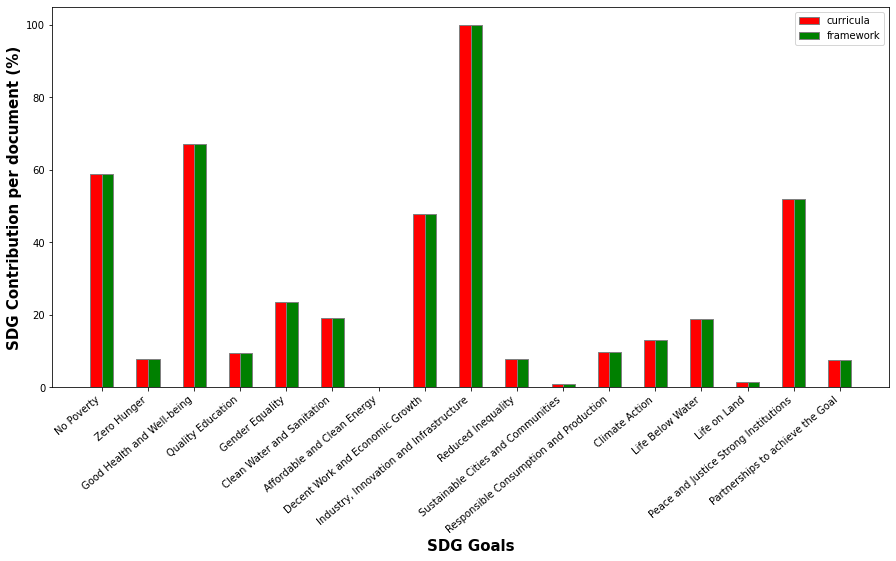

In [127]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(15, 7))

# Set position of bar on X axis
br1 = np.arange(len(curricula_sum))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, curricula_sum, color ='r', width = barWidth, edgecolor ='grey', label ='curricula')
plt.bar(br2, framework_sum, color ='g', width = barWidth, edgecolor ='grey', label ='framework')

# Adding Xticks
plt.xlabel('SDG Goals', fontweight ='bold', fontsize = 15)
plt.ylabel('SDG Contribution per document (%)', fontweight ='bold', fontsize = 15)
sdgs_labels = ['No Poverty', 'Zero Hunger', 'Good Health and Well-being', 'Quality Education', 'Gender Equality', 'Clean Water and Sanitation', 'Affordable and Clean Energy', 'Decent Work and Economic Growth', 'Industry, Innovation and Infrastructure', 'Reduced Inequality', 'Sustainable Cities and Communities', 'Responsible Consumption and Production', 'Climate Action', 'Life Below Water', 'Life on Land', 'Peace and Justice Strong Institutions', 'Partnerships to achieve the Goal']
plt.xticks([r + 0.5*barWidth for r in range(len(curricula_sum))], sdgs_labels, rotation=40, ha='right')

#ax.set_xticklabels(sdgs_labels, rotation=40, ha='right')

plt.legend()
#plt.savefig("sdg_similarity_plot.pdf", bbox_inches='tight')
plt.show()
